# Trabalho Computacional - capacitor de placas paralelas

### Williams Santiago de Souza Filho (wssf)

## Tópico 1

Utilizando o método dos momentos aplicado a esse contexto, nos interessa inferir a desconhecida distribuição superficial de carga $\sigma_s(\vec{r'})$ ao longo das placas (dado que elas estejam postas em $z=0$ e $z=d$). Desse modo, se torna possível calcular o potencial $V(\vec{r})$ em qualquer ponto do espaço de acordo com a relação:

$$V(\vec{r}) = \frac{1}{4 \pi \epsilon_0} \iint_{S'} \frac{\sigma_s(\vec{r'})}{\left|{\vec{r}-\vec{r'}}\right|} \ ds'$$

Com isso, a ideia geral do método é discretizar o domínio das placas condutoras em quadrados cujas áreas variam de acordo com a precisão de aproximação. Dessa maneira, é possível aproximar a distribuição superficial de carga de acordo com uma soma de funções pulso em cada quadrado discretizado do domínio:

$$\sigma_s(x,y,z) \approx \sum_{n=1}^{2N^2} a_n P_n(x,y,z)$$

Os coeficientes $a_n$ são indeterminados e os valores de $P_n(x,y,z)$ variam considerando que a discretização do domínio ocorre da seguinte maneira:

#### 1. definindo o tamanho dos quadrados

$$\Delta = \frac{L}{N}$$

onde $L$ é a medida dos lados da placa condutora e $N^2$, o total de quadrados discretizados.

#### 2. ordenando os quadrados com pontos centrais em $\vec{r_n}$, para $n = 1,2,3,...,2N^2$

$$x_i = (i-\frac{1}{2})\Delta, \ i = 1,2,...,N;$$
$$y_j = (j-\frac{1}{2})\Delta, \ j = 1,2,...,N;$$
$$z_k = kd, \ k = 0,1 \therefore$$

$$\vec{r_n} = (x_i, y_j, z_k), \ n = i + (j-1)N + kN^2$$

#### 3. finalmente determinando $P_n(x,y,z)$

$P_n = 1$ caso (x,y,z) determine um ponto que pertença à região interna do quadrado definida pelos vértices: $x_i - \Delta/2, \ x_i + \Delta/2, \ y_j - \Delta/2, \ y_j + \Delta/2$ para um certo $z = kd$. Se essa condição não for obedecida, $P_n = 0$.

Assim, nos resta agora determinar os coeficientes $a_n$ para conseguirmos aproximar nossa distribuição de cargas.

Para isso, vamos calcular no ponto $\vec{r_m} = (x_p, y_q, z_s)$ o potencial 

$$V(z_s) = \frac{1}{4 \pi \epsilon_0} \iint_{S'} \frac{\sigma_s(\vec{r'})}{\left|{\vec{r_m}-\vec{r'}}\right|} \ ds'$$

sabendo que $\sigma_s$ é aproximada por

$$\sigma_s(x,y,z) \approx \sum_{n=1}^{2N^2} a_n P_n(x,y,z)$$


Substituindo a aproximação na equação do potencial temos a seguinte expressão:

$$V(z_s) = \frac{1}{4 \pi \epsilon_0} \iint_{S'} \frac{\sum_{n=1}^{2N^2} a_n P_n(x,y,z)}{\left|{\vec{r_m}-\vec{r'}}\right|} \ ds' \therefore$$

$$V(z_s) = \sum_{n=1}^{2N^2} a_n \ \frac{1}{4 \pi \epsilon_0} \iint_{S'} \frac{P_n(x,y,z)}{\left|{\vec{r_m}-\vec{r'}}\right|} \ ds' \therefore$$

$$V(z_s) = \sum_{n=1}^{2N^2} a_n \ \frac{1}{4 \pi \epsilon_0} \int_{x_i - \Delta/2}^{x_i + \Delta/2} \int_{y_j - \Delta/2}^{y_j + \Delta/2} \frac{1}{\left|{\vec{r_m}-\vec{r'}}\right|} \ dx'dy', \ m = 1,2,...,2N^2$$

Finalmente, temos a equação linear acima com as $2N^2$ incógnitas $a_n$. Tal expressão pode ser reorganizada para ser escrita na forma matricial de acordo com a seguinte equação:

$$\Bigg[ \begin{matrix}  Z \end{matrix} \Bigg] \times \Bigg[ \begin{matrix}  a_1 \\ \vdots \\ a_{2N^2} \end{matrix} \Bigg] = \Bigg[ \begin{matrix}  V \end{matrix} \Bigg]$$

A matriz $[V]$ é a matriz de tensão cujos elementos têm valores $V_m$ dados de acordo com:

$$V_m = V(z_s) = \left\{\begin{matrix} 0, & 1 \leq m \leq N^2\\ V_0, & N^2 + 1 \leq m \leq 2N^2\\ \end{matrix}\right.$$

Já a matriz $[Z]$ é a matriz de impedância cujos elementos têm valores $Z_{mn}$ descritos por:

$$Z_{mn} = \frac{1}{4 \pi \epsilon_0} \int_{x_i - \Delta/2}^{x_i + \Delta/2} \int_{y_j - \Delta/2}^{y_j + \Delta/2} \frac{1}{\sqrt{(x_p-x')^2 + (y_q-y')^2 + (z_s-z_k)^2}} \ dx'dy'$$

aproximando para os casos em que $m = n$ ou $m \neq n$:

$$Z_{mn} \approx \left\{\begin{matrix} \frac{\Delta^2}{4\pi\epsilon_0 \sqrt{(x_p-x_i)^2 + (y_q-y_j)^2 + (z_s-z_k)^2}}, & m \neq n \\ \frac{\Delta}{\pi\epsilon_0} ln(1+\sqrt{2}), \ m = n\\ \end{matrix}\right.$$

## Tópico 2

Antes de resolvermos os problemas descritos pelas questões seguintes, vamos computar as funções que foram determinadas ao longo da utilização do MoM para resolver o problema das placas paralelas.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib import cm
from matplotlib.ticker import LinearLocator

##### Para definir o tamanho dos quadrados discretizados:

In [2]:
def delta(L, N):
    return L/N

##### Definindo os centros dos quadrados ordenados:

In [3]:
# "centers" é a matriz com os 2*N*N valores para os centros dos 2*N*N quadrados discretizados
# dado que rn(xi, yj, zk) = (i*delta - delta/2,  j*delta - delta/2, kd)

def setCenters(N, Delta, d): #assumindo Delta = delta(L, N) previamente
    centers = []
    
    for k in range(0, 2):
        for i in range(1, N+1):
            for j in range(1, N+1):
                centers.append([j*Delta - Delta/2, i*Delta - Delta/2, k*d])
                
    
    return centers

##### Computando a matriz de impedância:

In [4]:
# "impedances" é a matriz de impedâncias para um certo mn
# é dado que rm = (xp, yq, zs) é o ponto a ser calculado o potencial sobo referencial dado por rn = (xi, yj, zk)

def setImpedance(N, Delta, centers):
    epsilon0 = 8.85e-12
    impedances = []
    
    for m in range(0, 2*N*N):
        impedances.append([])
        for n in range(0, 2*N*N):
            if m == n:
                # zmn = delta/piE0 * ln[1 + raiz(2)]
                zmn = (Delta/(math.pi * epsilon0))*(math.log(1 + math.sqrt(2)))
                impedances[m].append(zmn)
            else:
                # zmn = 1/4piE0 * delta²/raiz[(xp - xi)² + (yq - yj)² + (zs - zk)²]
                zmn = 1/(4 * math.pi * epsilon0) * pow(Delta, 2)/math.sqrt(pow(centers[m][0] - centers[n][0], 2) + pow(centers[m][1] - centers[n][1], 2) + pow(centers[m][2] - centers[n][2], 2))
                impedances[m].append(zmn)
    
    return impedances

##### Computando a matriz de tensão:

In [5]:
# "tensions" é a matriz de tensões
# como foi definido previamente, a placa em z = 0 tem potencial nulo, enquanto que a placa em z = d tem potencial V0

def setTension(N, V0):
    tensions = []

    for n in range(0, 2*N*N):
        tensions.append(0 if (n < N*N) else V0)
    
    return tensions

##### Determinando os coeficientes $a_n$ ao resolver o sistema de equações lineares:

In [6]:
def linear_solution(impedances, tensions):
    coefficients = np.linalg.solve(impedances, tensions)
    
    return coefficients

##### Agora que temos o que é preciso, podemos definir as funções para plotar nossa aproximação para as distribuições de carga:

In [7]:
def inferior_superior_plot(centers, coefficients, N):
    centers = np.array(centers)
    
    # Para a placa inferior, com $z = 0$:
    # X, Y e Z são setados de acordo com os N*N primeiros quadrados discretizados
    X = centers[:len(centers)//2, 1]
    Y = centers[:len(centers)//2, 0]
    Z = np.array(coefficients[:len(coefficients)//2])

    X = np.reshape(X,(N, N))
    Y = np.reshape(Y,(N, N))
    Z = np.reshape(Z,(N, N))
    
    # Gráfico plotado para a placa em z = 0
    fig = plt.figure(figsize=plt.figaspect(0.25))
    
    ax = fig.add_subplot(1, 3, 1, projection='3d')
    ax.set_title('slab charge distribution at z = 0 when N =' + str(N))
    ax.plot_surface(X, Y, Z, cmap=plt.cm.YlGnBu_r, linewidth=0, antialiased=True)
    
    # Para a placa superior, com $z = d$:
    # X, Y e Z são setados de acordo com os N*N últimos quadrados discretizados
    X = centers[len(centers)//2:len(centers), 1]
    Y = centers[len(centers)//2:len(centers), 0]
    Z = np.array(coefficients[len(coefficients)//2:len(coefficients)])

    X = np.reshape(X,(N, N))
    Y = np.reshape(Y,(N, N))
    Z = np.reshape(Z,(N, N))
   
    # Gráfico plotado para a placa em z = d
    ax = fig.add_subplot(1, 3, 3, projection='3d')
    ax.set_title('slab charge distribution at z = d when N =' + str(N))
    ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=True)

    plt.show()

    

## Tópico 3

Para o caso em que $L = 10$ cm, $d = 1$ mm e $V_0 = 1$ V, vamos resolver o sistema linear. para $N = 12$. 

In [8]:
# data
L = 0.1
d = 0.001
V0 = 1
N = 12

Delta = delta(L, N)
centers = setCenters(N, Delta, d)
impedances = setImpedance(N, Delta, centers)
tensions = setTension(N, V0)

coefficients = linear_solution(impedances, tensions)

##### Determinados os coeficientes, vamos agora plotar o resultado:

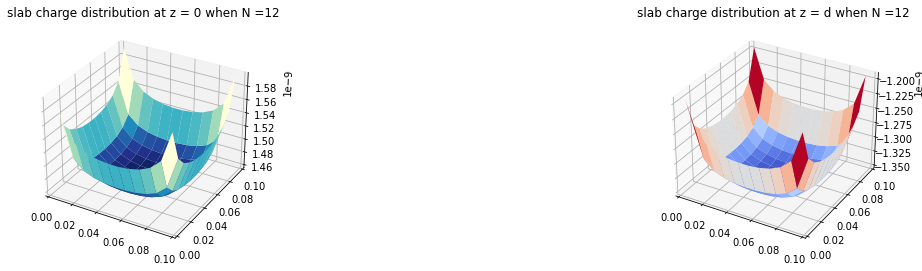

Wall time: 400 ms


In [9]:
%%time
inferior_superior_plot(centers, coefficients, N)

##### Com isso, a distribuição total de cargas nas duas placas paralelas pode ser aproximada de acordo com: 

$$\sigma_s(x,y,z) \approx \sum_{n=1}^{2N^2} a_n P_n(x,y,z)$$

##### como foi  descrito anteriormente. Assim, temos que:

In [10]:
def total_sigma(coefficients):
    # dado que len(coefficients) = 2*N*N
    return sum(coefficients)

Para os valores dos coeficientes calculados anteriormente, eles obedecem o gráfico descrito e culminam no sigma indicado:

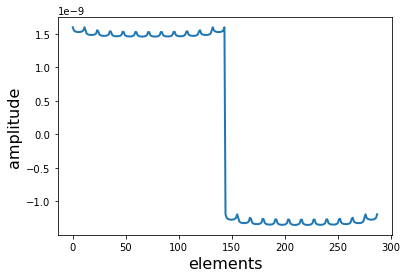

sigma =  2.648298904278245e-08 C/m²


In [11]:
# Plotando o gráfico dos pulsos
plt.xlabel('elements', fontsize=16)
plt.ylabel('amplitude', fontsize=16)
plt.plot(coefficients, linewidth=2.0)
plt.show()

sigma = total_sigma(coefficients)
print('sigma = ', sigma, 'C/m²')

## Tópico 4

##### Observemos o que acontece quando variamos $N$ (mantendo os valores de $L, \ d, \ V0$) de acordo com a sequência $5, 10, 15, 20,...,80$:

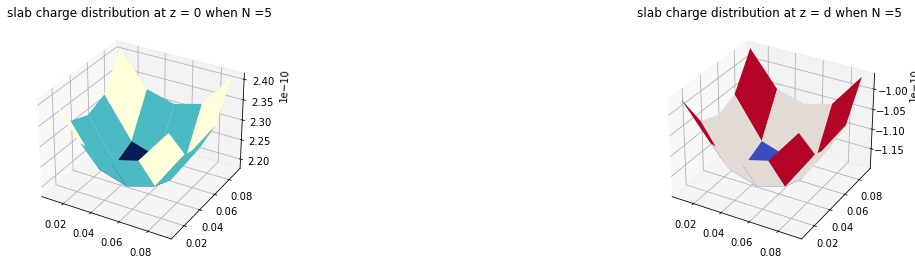

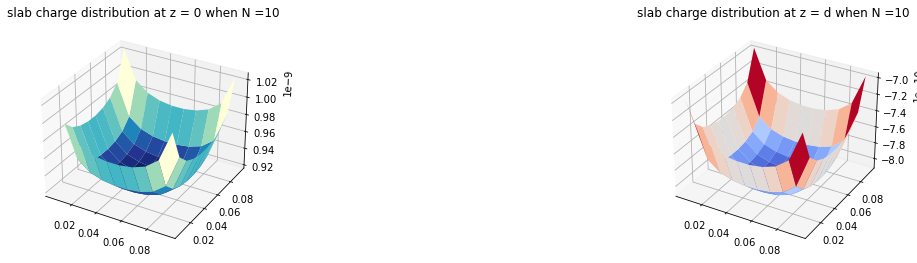

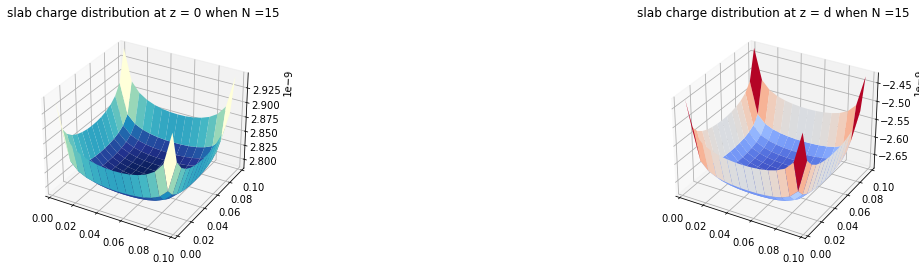

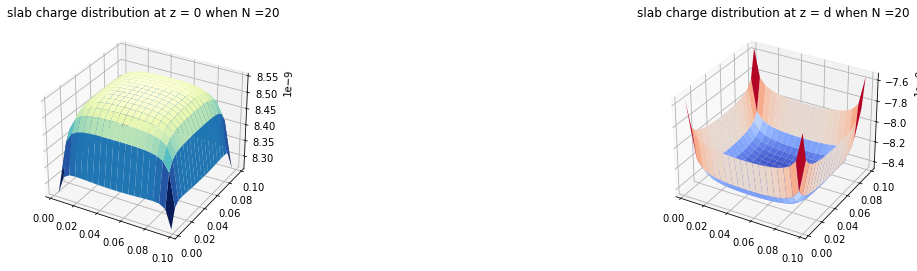

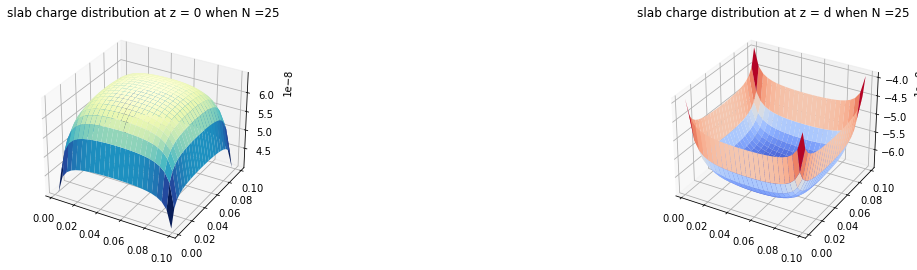

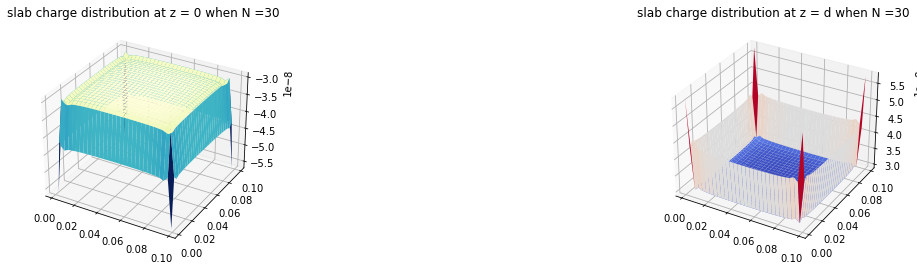

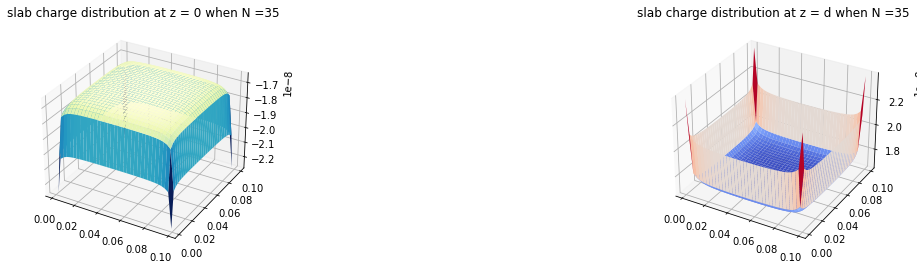

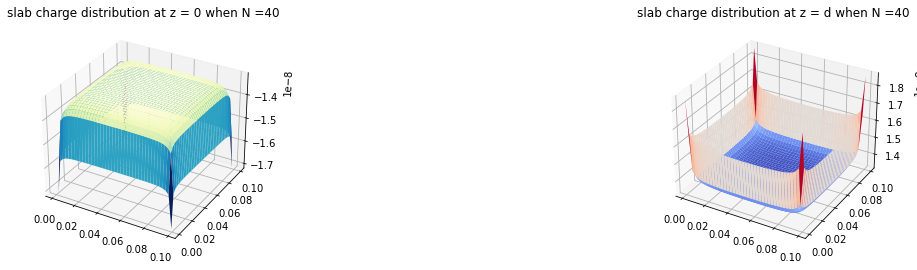

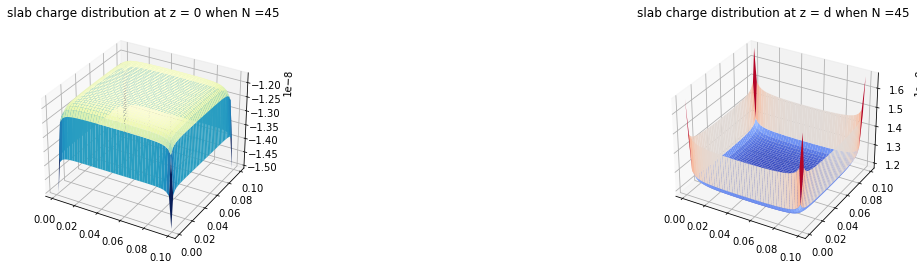

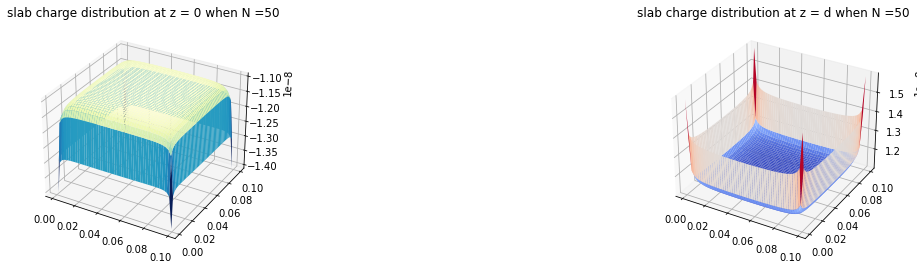

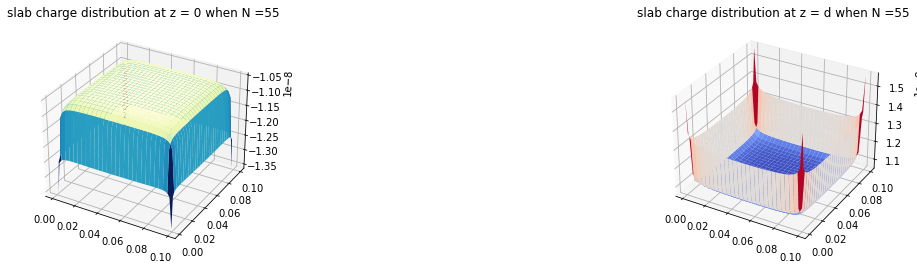

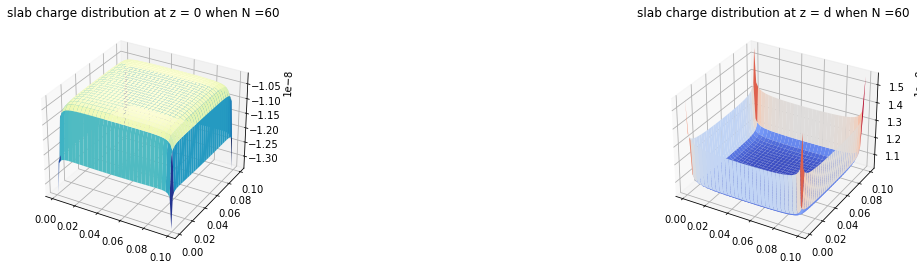

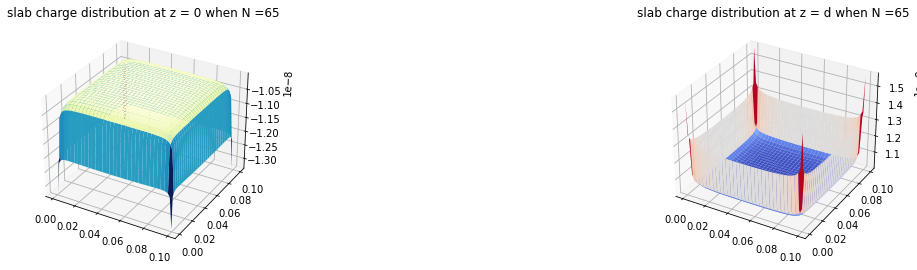

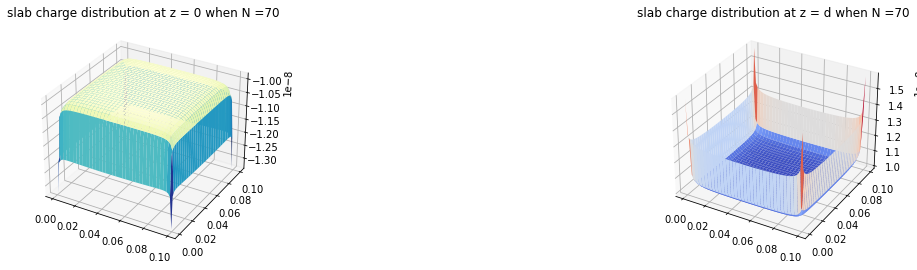

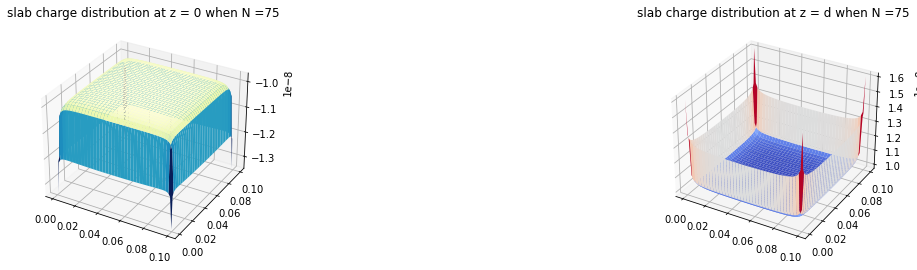

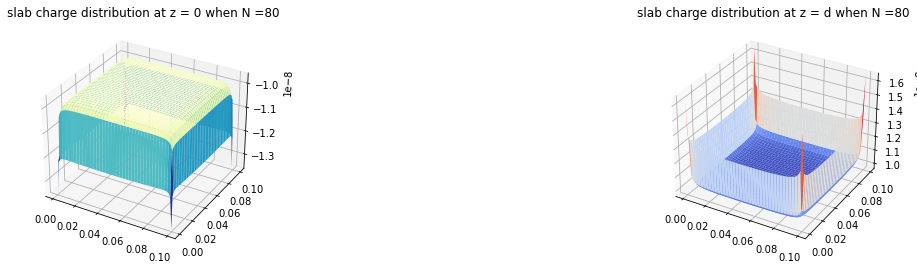

In [12]:
for N in range(5, 81):
    if N % 5 == 0:
        
        # Para cada N que assume um dos valores da sequência dada acima
        # é plotada a distribuição de carga de ambas as placas.
        Delta = delta(L, N)
        centers = setCenters(N, Delta, d) # calculando os centros dos sub-domínios
        impedances = setImpedance(N, Delta, centers) # definindo matriz de impedância
        tensions = setTension(N, V0) # definindo matriz de tensão

        coefficients = linear_solution(impedances, tensions) # deterinando os coeficientes
        
        inferior_superior_plot(centers, coefficients, N) # plotando a distribuição

#### Após analisar os demais gráficos, é possível perceber que as cargas (em ambas as placas), à medida que o número $N$ de quadrados discretizados cresce e a aproximação reflete cada vez mais a realidade, tendem a se distribuírem concentrando-se principalmente nas pontas das placas paralelas (nos vértices do quadrado que as define) e também em torno de seu bordo . Assim, os gráficos nos mostram experimentalmente o fenômeno do poder das pontas.

## Tópico 5

Sabe-se que a capacitância obedece a seguinte relação:

$$C = \frac{Q}{V}$$

onde $Q$ é a carga total do capacitor e $V$ a diferença de potencial entre suas placas.

Para esse nosso caso, utilizando o método dos momentos, podemos aproximar a capacitância de um dado capacitor de placas paralelas. Isso pode ser feito sabendo que $V = V_0$ (placa inferior tem potencial nulo) e que:

$$Q_{z=d} = \Delta^2 \sum_{n=N^2}^{2N^2} a_n$$

onde $a_n$ são os coeficientes determinados na solução do sistema de equações lineares para impedância e tensão.

Assim, temos uma aproximação para a capacitância das placas:

$$C_{z=d} \approx \frac{\Delta^2 \sum_{n=N^2}^{2N^2} a_n}{V_0}$$

No entanto, analiticamente, a capacitância para esse contexto pode ser definida de acordo com:

$$C = \epsilon_0 \frac{área}{distância}$$

onde $área = L^2$ para uma placa quadrada de lado $L$ e $distância = d$ já que as placas estão em $z=0$ e $z=d$. Portanto,

$$C = \epsilon_0 \frac{L^2}{d}$$

##### Para compararmos os valores aproximado e analítico, variemos $N$ (mantendo os valores de $L, \ d, \ V0$ do tópico 3) de acordo com a sequência $5, 10, 15, 20,...,80$ e analisemos o gráfico:

In [13]:
# "capacitances" vai guardar os valores de capacitância aproximados calculados para cada um dos valores de N assumidos
# de acordo com a sequência acima.

capacitances = []

for N in range(5, 81):
    if N % 5 == 0:
        Delta = delta(L, N)
        centers = setCenters(N, Delta, d)
        impedances = setImpedance(N, Delta, centers)
        tensions = setTension(N, V0)
        coefficients = linear_solution(impedances, tensions)
        
        # c ~ delta**2 * sum(an) / v0
        capacitance_zd = (Delta * Delta)*(sum(coefficients[N*N:2*N*N]))/V0
        
        capacitances.append(capacitance_zd)



##### Computados os valores aproximados da capacitância para diferentes valores de $N$, nos resta determinar seu valor analítico:

In [14]:
epsilon0 = 8.85e-12
analytical_capacitance = epsilon0 * L * L / d
print("capacitância analítica =", analytical_capacitance, "F")

capacitância analítica = 8.850000000000002e-11 F


##### Plotando o gráfico das diferenças entre a capacitância aproximada e seu valor analítico para os diferentes valores de $N$ utilizados:

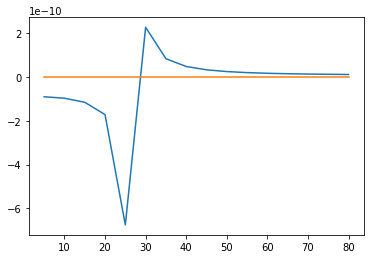

In [15]:
# Plotando o gráfico das diferenças e observando a convergência para 0 quando N -> inf
plt.plot(np.array(range(5, 85, 5)), np.array(capacitances)-analytical_capacitance)
plt.plot(np.array(range(5, 85, 5)), np.zeros(len(range(5, 85, 5))))
plt.show()

Finalmente, analisando o gráfico das diferenças, percebe-se que, à medida que $N$ aumenta, a diferença entre a capacitância aproximada e a analítica tende a 0. Isso quer dizer, portanto, que nossa aproximação para a capacitância reflete bem a realidade analítica quando discretizamos o domínio das placas em um número $N$ muito grande de quadrados de sub-domínio.